## HeartFailure data preprocessing

### Importing necessary libraries

In [1]:
import os
import sys
current_directory=os.getcwd()
parent_directory=os.path.dirname(current_directory)
sys.path.append(parent_directory)


In [2]:
parent_directory

'/home/sbigast1/private/NextConvGeN_benchmarking/NextConvGeN_benchmark'

In [3]:
import numpy as np
from library.generators.NextConvGeN import NextConvGeN


2024-01-31 11:59:18.145116: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-31 11:59:18.145135: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC
from fdc.clustering import *

In [5]:
import pandas as pd

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Importing data

In [7]:
data=pd.read_csv('Preprocessed_DM_xx.csv')

In [8]:
np.random.seed(42)
HTN_indexes=data.loc[(data['Currently.taking.a.prescribed.medicine.to.lower.BP'] != 0) | (data['First.SYSTOLIC.reading'] >= 140) | (data['First.DIASTOLIC.reading'] >= 90) ].index.values
HTN_cols=np.zeros(data.shape[0])
HTN_cols[[HTN_indexes]]=1
data['HTN']=HTN_cols
data=data.drop(["First.SYSTOLIC.reading","First.DIASTOLIC.reading","Currently.taking.a.prescribed.medicine.to.lower.BP"], axis=1)
data=data.reset_index(drop=True)
data.columns
data=data.drop(["Hb_adjust_alt_smok","Second.SYSTOLIC.reading","Second.DIASTOLIC.reading","Third.SYSTOLIC.reading","Third.DIASTOLIC.reading","Hb_status","Glucose.level",'SBP_status'], axis=1)
data=data.loc[data['BMI'] != 99.99]
data=data.loc[data['Hemoglobin.level..g.dl...1.decimal.'] != 99.99]
data=data.loc[data['Currently.has.asthma'] != .5]
data=data.loc[data['Currently.has.thyroid.disorder'] != .5]
data=data.loc[data['Currently.has.heart.disease'] != .5]
data=data.loc[data['Currently.has.cancer'] != .5]
data=data.loc[data['DM_history'] == 1]
data=data.loc[data['Type.of.caste.or.tribe.of.the.household.head'] != 0]
data=data.loc[data['Time.to.get.to.water.source..minutes.'] != -1]
data=data.drop(["Unnamed: 0","DM_status","DM_history"], axis=1)

In [9]:
np.random.seed(42)
data=data.sample(frac=1)

In [10]:
data

,Current.age,Sex,Currently.has.asthma,Currently.has.thyroid.disorder,Currently.has.heart.disease,Currently.has.cancer,Suffers.from.TB,BMI,Hemoglobin.level..g.dl...1.decimal.,Frequency.takes.milk.or.curd,...,Has.refrigerator,Has.bicycle,Has.motorcycle.scooter,Has.car.truck,Type.of.cooking.fuel,Household.structure,Owns.livestock..herds.or.farm.animals,Source.of.drinking.water,Time.to.get.to.water.source..minutes.,HTN
258196,34,1,0.0,0.0,0.0,0.0,0,35.24,11.1,2,...,1,1,1,0,3,0,0,4,10,0.0
188164,48,1,0.0,0.0,0.0,1.0,0,20.50,10.9,2,...,0,0,1,0,1,0,1,3,30,0.0
348270,30,1,0.0,0.0,0.0,0.0,0,30.34,12.3,2,...,1,1,1,0,3,0,0,3,0,0.0
469410,43,1,0.0,0.0,0.0,0.0,0,22.51,7.8,2,...,1,1,1,0,3,0,1,2,10,0.0
45365,30,1,0.0,0.0,0.0,0.0,0,24.39,12.6,0,...,1,0,0,0,3,1,0,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398124,30,0,0.0,0.0,0.0,0.0,0,22.11,15.4,3,...,1,0,0,0,3,0,0,4,10,1.0
351146,44,1,0.0,0.0,0.0,0.0,0,28.94,12.9,3,...,1,1,1,0,1,0,1,3,0,0.0
363318,48,1,0.0,1.0,0.0,0.0,0,25.71,15.5,3,...,1,1,0,0,3,0,0,2,0,1.0
62518,48,1,0.0,0.0,0.0,0.0,0,27.71,13.4,3,...,1,0,1,1,3,1,0,3,0,0.0


In [11]:
data.drop_duplicates(inplace=True, ignore_index=True)

output_file_path=os.path.join(parent_directory,"PreprocessedDatasets/T2DM.csv")
data.to_csv(output_file_path, index=False)

In [12]:
np.random.seed(42)
data=data.sample(frac=1)

In [13]:
values = ['Drinks.alcohol', 'Smoking_stat','Has.refrigerator',
       'Has.bicycle', 'Has.motorcycle.scooter', 'Has.car.truck', 'Owns.livestock..herds.or.farm.animals','Frequency.takes.milk.or.curd',
       'Frequency.eats.pulses.or.beans',
       'Frequency.eats.dark.green.leafy.vegetable', 'Frequency.eats.fruits',
       'Frequency.eats.eggs', 'Frequency.eats.fish',
       'Frequency.eats.chicken.or.meat', 'Frequency.eats.fried.food',
       'Frequency.takes.aerated.drinks','Frequency.household.members.smoke.inside.the.house','Wealth.index',
       'Highest.educational.level','Currently.has.asthma','Currently.has.thyroid.disorder','Currently.has.heart.disease',
       'Currently.has.cancer', 'Suffers.from.TB','HTN','Current.age','BMI','Hemoglobin.level..g.dl...1.decimal.','Time.to.get.to.water.source..minutes.','Household.head.s.religion', 'Sex', 'Type.of.place.of.residence', 'Household.structure',
       'Type.of.caste.or.tribe.of.the.household.head','Type.of.cooking.fuel','Source.of.drinking.water']

In [14]:
data=data[values]

### UMAP on entire data

In [15]:
from fdc.fdc import feature_clustering

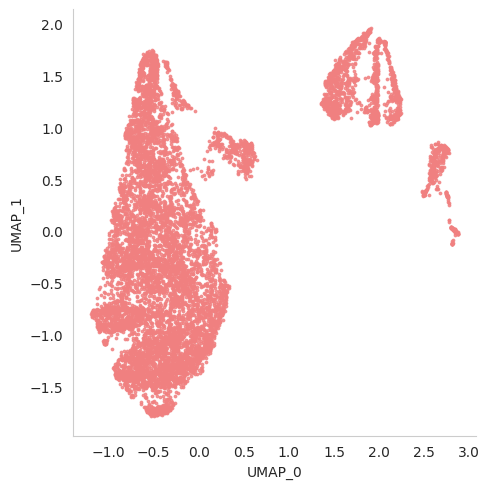

In [16]:
np.random.seed(42)
umap_emb=feature_clustering(30,0.1,'euclidean',data,True)

### Feature-type Distributed Clustering (FDC)

In [17]:
ord_list=['Drinks.alcohol', 'Smoking_stat','Has.refrigerator',
       'Has.bicycle', 'Has.motorcycle.scooter', 'Has.car.truck', 'Owns.livestock..herds.or.farm.animals','Frequency.takes.milk.or.curd',
       'Frequency.eats.pulses.or.beans',
       'Frequency.eats.dark.green.leafy.vegetable', 'Frequency.eats.fruits',
       'Frequency.eats.eggs', 'Frequency.eats.fish',
       'Frequency.eats.chicken.or.meat', 'Frequency.eats.fried.food',
       'Frequency.takes.aerated.drinks','Frequency.household.members.smoke.inside.the.house','Wealth.index',
       'Highest.educational.level','Currently.has.asthma','Currently.has.thyroid.disorder','Currently.has.heart.disease',
       'Currently.has.cancer', 'Suffers.from.TB','HTN']

cont_list=['Current.age','BMI','Hemoglobin.level..g.dl...1.decimal.','Time.to.get.to.water.source..minutes.']

nom_list=['Household.head.s.religion', 'Sex', 'Type.of.place.of.residence', 'Household.structure',
       'Type.of.caste.or.tribe.of.the.household.head','Type.of.cooking.fuel','Source.of.drinking.water']

target = None


In [18]:
output_file_path=os.path.join(parent_directory,"PreprocessedDatasets/T2DM.json")

In [19]:
import json

features = {
    "cont_list": cont_list,
    "nom_list": nom_list,
    "ord_list": ord_list,
    "target": target
}

with open(output_file_path, "w") as json_file:
    json.dump(features, json_file)

FDC.normalize (init): 0.00001 / 0.000s


FDC.normalize (clustering CONT): 12.82359 / 12.824s


FDC.normalize (clustering ORD): 111.72276 / 124.546s
FDC.normalize (clustering NOM): 0.00006 / 124.546s
FDC.normalize (concat): 0.00026 / 124.547s


FDC.normalize (umap 5 -> 2): 13.28460 / 137.831s
FDC.normalize (array -> DataFrame): 0.00028 / 137.832s


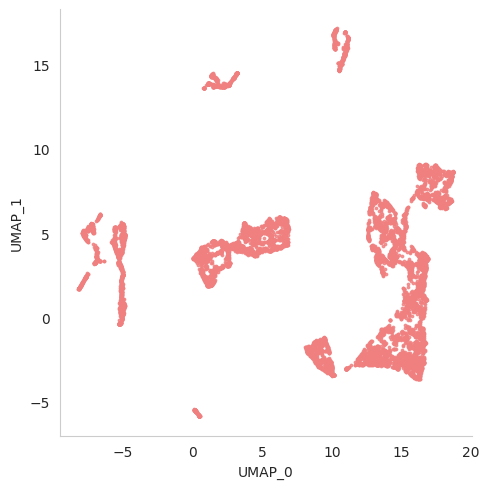

FDC.normalize (plotting): 0.40111 / 138.233s
FDC.normalize (array -> DataFrame): 0.00018 / 138.233s
FDC.normalize (total): 0.00001 / 138.233s


In [20]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC
np.random.seed(42)

fdc = FDC(clustering_cont=Clustering('euclidean',30,0.01)
          , clustering_ord=Clustering(canberra_modified,30,0.01)
          , visual=True
          , use_pandas_output=True
          , with_2d_embedding=True
          )

fdc.selectFeatures(continueous=cont_list, ordinal=ord_list)

FDC_emb_high,FDC_emb_low = fdc.normalize(data,cont_list=cont_list, ord_list=ord_list,
                  with_2d_embedding=True,
                  visual=True)

### Clustering using K-means

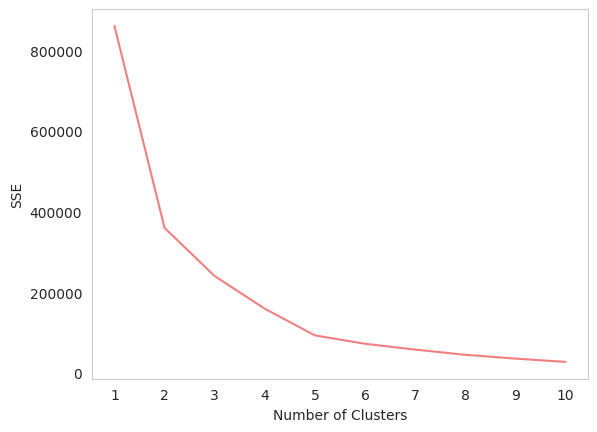

In [21]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(FDC_emb_low)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [22]:
def find_optimal_cluster(FDC_emb_low):
    silhouette_scores = []

    for n_clusters in list(range(2, 9)):
        km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=100, random_state=42)

        km.fit(FDC_emb_low)

        labels = km.labels_

        # Compute the silhouette score
        silhouette_avg = silhouette_score(FDC_emb_low, labels)
        silhouette_scores.append(silhouette_avg)
    return silhouette_scores

In [23]:
find_optimal_cluster(FDC_emb_low)

[0.53822666,
 0.49458274,
 0.5093129,
 0.57682496,
 0.5896604,
 0.6164692,
 0.61482507]

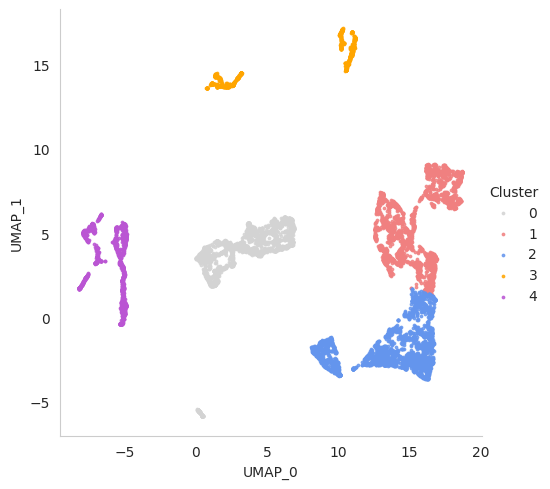

In [24]:
from fdc.clustering import *
np.random.seed(42)
clustering=Clustering(FDC_emb_low,FDC_emb_low,True)
cluster_list,cluster_counts=clustering.K_means(5)

In [25]:
cluster_counts

array([2382, 2648, 2890,  832, 1373])

In [26]:
data['Target']=cluster_list

In [27]:
output_file_path=os.path.join(parent_directory,"PreprocessedDatasets/SST2DM.csv")
data.to_csv(output_file_path, index=False)

In [28]:
data

,Drinks.alcohol,Smoking_stat,Has.refrigerator,Has.bicycle,Has.motorcycle.scooter,Has.car.truck,Owns.livestock..herds.or.farm.animals,Frequency.takes.milk.or.curd,Frequency.eats.pulses.or.beans,Frequency.eats.dark.green.leafy.vegetable,...,Hemoglobin.level..g.dl...1.decimal.,Time.to.get.to.water.source..minutes.,Household.head.s.religion,Sex,Type.of.place.of.residence,Household.structure,Type.of.caste.or.tribe.of.the.household.head,Type.of.cooking.fuel,Source.of.drinking.water,Target
3781,0,0,0,0,1,0,1,3,3,3,...,15.1,0,2,0,1,0,3,1,2,1
2922,0,0,0,1,1,1,1,3,2,1,...,8.9,0,0,1,1,0,1,2,2,0
5070,0,0,0,1,0,0,0,3,3,3,...,13.1,0,1,1,1,1,1,3,2,1
7246,0,0,1,1,1,0,0,1,3,3,...,12.2,0,1,1,0,0,4,3,3,2
623,0,0,1,1,1,0,1,0,1,3,...,12.9,0,0,1,1,1,1,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0,0,1,1,1,1,1,0,3,3,...,13.7,0,0,0,1,1,4,3,3,2
5191,0,0,0,1,0,0,1,1,2,3,...,11.2,2,0,1,1,1,2,1,2,1
5390,0,0,0,0,0,0,0,2,3,3,...,9.6,0,0,1,0,1,4,3,4,0
860,0,0,0,0,0,0,0,1,3,3,...,13.1,30,0,1,1,1,2,1,2,3
